# Visualización de datos con Python

**Author:** Roberto P. Muñoz<br />
**Email:** <rmunoz@uc.cl>

**Python** es un lenguaje de programación abierto que fue creado por Guido van Rossum y publicado el año 1991. Python es uno de los lenguajes más empleados por la comunidad de Data Scientists del mundo y cuenta con un gran número de librerías para procesar, analizar y visualizar datos.

Para visualizar datos en Python, perimero debemos cargar algunas librerías. Las librerías más empleadas para analizar y visualizar datos son,

- **numpy**: Numpy es una librería de Python usada para cálculo numérico y científico. Abreviatura de Numerical Python.


- **pandas**: Pandas es una librería de Python usada para el análisis de datos. Ofrece estructuras de datos flexibles y permite trabajar con ellos de forma muy eficiente.


- **matplotlib**: Matplotlib es la librería más popular de Python para hacer visualizaciones y gráficos. Matplotlib posee gran flexibilidad para generar diferentes tipos de gráficos.


- **seaborn**: Seaborn es una librería de visualización basada en matplotlib. La idea de Seaborn es que los científicos de datos dispongan de una interfaz para hacer gráficos estadísticos atractivos e explicativos.

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 7.5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Lectura de datos

Para este tutorial usaremos una base de datos de vuelos áreos publicados por el sitio web Openflights. La base de datos contiene una tabla de los aeropuertos en el mundo (**`aeropuertos.csv`**), una tabla de las aerolíneas en el mundo (**`aerolineas.csv`**) y una tabla de las rutas de sus vuelos comerciales (**`rutas.csv`**).

Más información en https://github.com/jpatokal/openflights

In [118]:
aeropuertos_file='data/aeropuertos.csv'
aerolineas_file='data/aerolineas.csv'
rutas_file='data/rutas.csv'

aeropuertos=pd.read_csv(aeropuertos_file)
aerolineas=pd.read_csv(aerolineas_file)
rutas=pd.read_csv(rutas_file)

In [119]:
aeropuertos.head()

,Id,Nombre,Ciudad,Pais,IATA,OACI,Latitud,Longitud,Altitud,Zona_horaria,Horario_verano,Zona_horaria_lugar,Tipo,Fuente
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,1610.0,10.0,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,6.1,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,1642.3,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,72.8,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,44.5,10.0,U,Pacific/Port_Moresby,airport,OurAirports


In [120]:
aerolineas.head()

,Línea_aérea_Id,Línea_aérea,Alias,IATA,OACI,Sigla_identificación,País,Activa
0,-1,Unknown,NaN,-,NaN,NaN,NaN,Y
1,1,Private flight,NaN,-,NaN,NaN,NaN,Y
2,2,135 Airways,NaN,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,NaN,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,NaN,NaN,WYT,NaN,United Kingdom,N


In [121]:
rutas.head()

,Linea_aerea,Linea_aerea_Id,Aeropuerto_origen,Aeropuerto_origen_Id,Aeropuerto_destino,Aeropuerto_destino_Id,Vuelo_operado,Numero_paradas,Modelo_avion,Pais_origen,Pais_destino,Distancia_km
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2,Russia,Russia,1505.879589
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2,Russia,Russia,1039.785086
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2,Russia,Russia,447.883531
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2,Russia,Russia,770.024740
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2,Russia,Russia,1337.791014


## Visualización de datos

### 1. Histograma de frecuencia absoluta

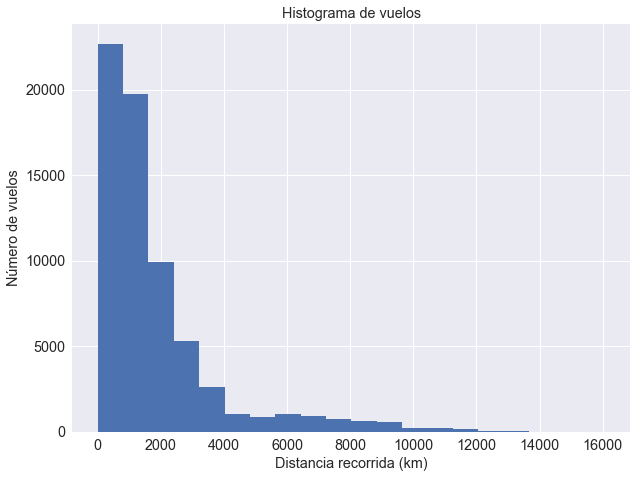

In [169]:
n, bins, patches = plt.hist(rutas['Distancia_km'], bins=20)
plt.xlabel('Distancia recorrida (km)')
plt.ylabel('Número de vuelos')
plt.title('Histograma de vuelos')

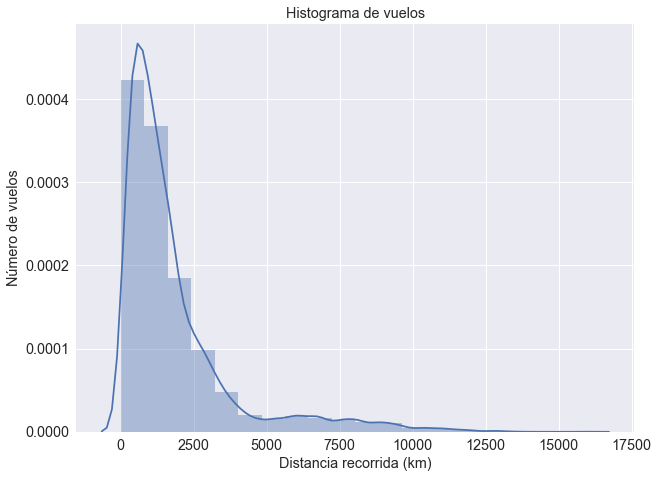

In [70]:
sns.distplot(rutas['Distancia_km'], bins=20)
plt.xlabel('Distancia recorrida (km)')
plt.ylabel('Número de vuelos')
plt.title('Histograma de vuelos')

### 2. Gráfico de barras

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

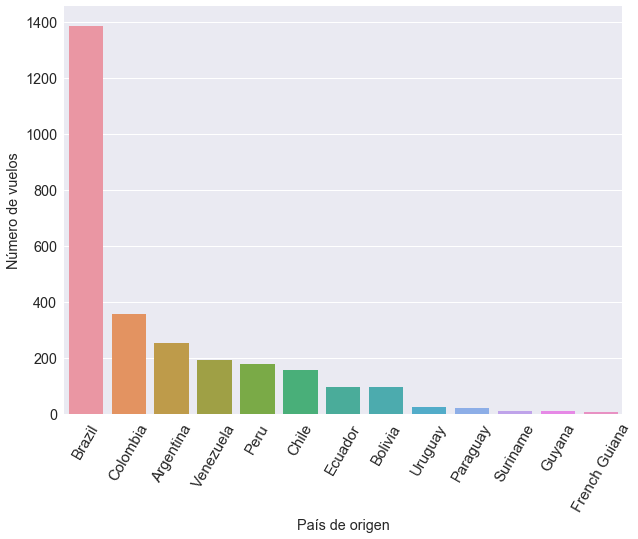

In [175]:
paises_sudamerica=['Brazil','Colombia','Argentina','Peru','Venezuela','Chile','Ecuador','Bolivia','Paraguay','Uruguay','Guyana','Suriname','French Guiana']
rutas_sudamerica=rutas[rutas['Pais_origen'].isin(paises_sudamerica)]
rutas_sudamerica_pais=rutas_sudamerica.groupby('Pais_origen')['Linea_aerea'].agg('count').sort_values(ascending=False)

sns.countplot(x="Pais_origen", order=rutas_sudamerica_pais.index.tolist(), data=rutas_sudamerica)
plt.xlabel('País de origen')
plt.ylabel('Número de vuelos')
plt.xticks(size = 15, rotation=60)

### 3. Gráfico de cajas

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

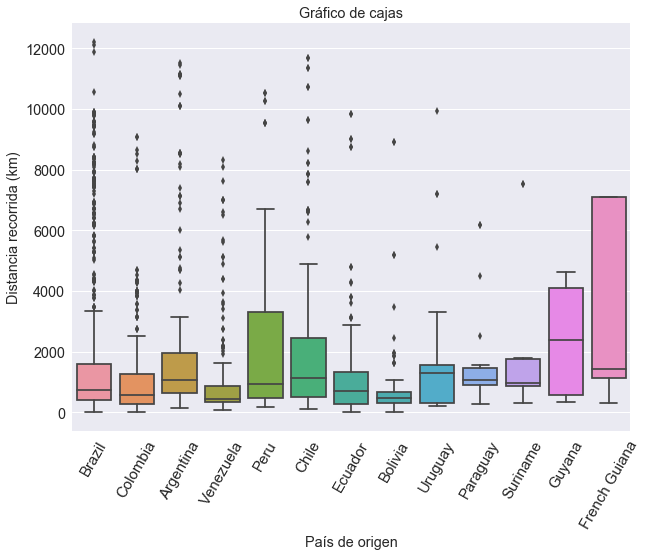

In [176]:
#rutas_sudamerica.boxplot(column='Distancia_km', by='Pais_origen', rot=60, order=rutas_sudamerica_pais.index.tolist())
sns.boxplot(x='Pais_origen', y='Distancia_km', order=rutas_sudamerica_pais.index.tolist(), data=rutas_sudamerica)
plt.xlabel('País de origen')
plt.ylabel('Distancia recorrida (km)')
plt.title('Gráfico de cajas')
plt.xticks(size = 15, rotation=60)

### 4. Gráfico de puntos

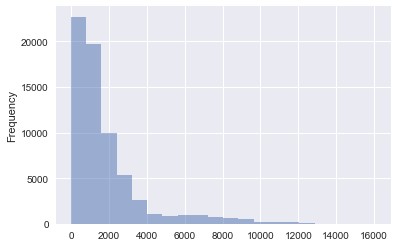

In [28]:
rutas['Largo_km'].plot.hist(alpha=0.5, bins=20)

## Preparación de datasets

In [74]:
aeropuertos_file='data/airports.dat'
aeropuertos=pd.read_csv(aeropuertos_file, header=None)

aeropuertos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [75]:
columnas=['Id','Nombre','Ciudad','Pais','IATA','OACI','Latitud','Longitud','Altitud','Zona_horaria','Horario_verano','Zona_horaria_lugar','Tipo','Fuente']
aeropuertos.columns = columnas
aeropuertos = aeropuertos.replace("\\N", value=np.nan)
aeropuertos['Altitud']=np.round(aeropuertos['Altitud']*0.3048,1)
aeropuertos[['Zona_horaria','Altitud']] = aeropuertos[['Zona_horaria','Altitud']].apply(pd.to_numeric)
aeropuertos.head()

,Id,Nombre,Ciudad,Pais,IATA,OACI,Latitud,Longitud,Altitud,Zona_horaria,Horario_verano,Zona_horaria_lugar,Tipo,Fuente
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,1610.0,10.0,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,6.1,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,1642.3,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,72.8,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,44.5,10.0,U,Pacific/Port_Moresby,airport,OurAirports


In [89]:
aeropuertos.dtypes

Id                      int64
Nombre                 object
Ciudad                 object
Pais                   object
IATA                   object
OACI                   object
Latitud               float64
Longitud              float64
Altitud               float64
Zona_horaria          float64
Horario_verano         object
Zona_horaria_lugar     object
Tipo                   object
Fuente                 object
dtype: object

In [77]:
aeropuertos.to_csv('data/aeropuertos.csv', index=False)

In [110]:
rutas_file='data/routes.dat'
rutas=pd.read_csv(rutas_file, header=None)

rutas.head()

,0,1,2,3,4,5,6,7,8
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [111]:
columnas=['Linea_aerea','Linea_aerea_Id','Aeropuerto_origen','Aeropuerto_origen_Id','Aeropuerto_destino','Aeropuerto_destino_Id','Vuelo_operado','Numero_paradas','Modelo_avion']
rutas.columns = columnas
rutas = rutas[(rutas["Linea_aerea_Id"] != "\\N") & (rutas["Aeropuerto_origen_Id"] != "\\N") & (rutas["Aeropuerto_destino_Id"] != "\\N")]
rutas[['Linea_aerea_Id','Aeropuerto_origen_Id','Aeropuerto_destino_Id']] = rutas[['Linea_aerea_Id','Aeropuerto_origen_Id','Aeropuerto_destino_Id']].apply(pd.to_numeric)
rutas.head()

,Linea_aerea,Linea_aerea_Id,Aeropuerto_origen,Aeropuerto_origen_Id,Aeropuerto_destino,Aeropuerto_destino_Id,Vuelo_operado,Numero_paradas,Modelo_avion
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [112]:
rutas.dtypes

Linea_aerea              object
Linea_aerea_Id            int64
Aeropuerto_origen        object
Aeropuerto_origen_Id      int64
Aeropuerto_destino       object
Aeropuerto_destino_Id     int64
Vuelo_operado            object
Numero_paradas            int64
Modelo_avion             object
dtype: object

In [113]:
def pais_aeropuerto(row, name):
    result='Unknown'
    try:
        result = aeropuertos[aeropuertos["Id"] == row[name]].iloc[0]
        result = result['Pais']
    except (ValueError, IndexError):
        pass
    return result

In [114]:
rutas['Pais_origen']=rutas.apply(pais_aeropuerto, name='Aeropuerto_origen_Id', axis=1)
rutas['Pais_destino']=rutas.apply(pais_aeropuerto, name='Aeropuerto_destino_Id', axis=1)

In [115]:
import math

def haversine(lon1, lat1, lon2, lat2):
    # Convert coordinates to floats.
    lon1, lat1, lon2, lat2 = [float(lon1), float(lat1), float(lon2), float(lat2)]
    # Convert to radians from degrees.
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    # Compute distance.
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    km = 6367 * c
    return km

def calcular_distancia(row):
    dist = 0
    try:
        # Match source and destination to get coordinates.
        source = aeropuertos[aeropuertos["Id"] == row["Aeropuerto_origen_Id"]].iloc[0]
        dest = aeropuertos[aeropuertos["Id"] == row["Aeropuerto_destino_Id"]].iloc[0]
        # Use coordinates to compute distance.
        dist = haversine(dest["Longitud"], dest["Latitud"], source["Longitud"], source["Latitud"])
    except (ValueError, IndexError):
        pass
    return dist

In [116]:
rutas['Distancia_km'] = rutas.apply(calcular_distancia, axis=1)

In [117]:
rutas.to_csv('data/rutas.csv', index=False)

In [30]:
aerolineas_file='data/airlines.dat'
aerolineas=pd.read_csv(aerolineas_file, header=None)

aerolineas.head()

,0,1,2,3,4,5,6,7
0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N


In [31]:
columnas=['Línea_aérea_Id','Línea_aérea','Alias','IATA','OACI','Sigla_identificación','País','Activa']
aerolineas.columns = columnas
aerolineas = aerolineas.replace("\\N", value=np.nan)
aerolineas['Línea_aérea_Id'] = aerolineas['Línea_aérea_Id'].apply(pd.to_numeric)
aerolineas.head()

,Línea_aérea_Id,Línea_aérea,Alias,IATA,OACI,Sigla_identificación,País,Activa
0,-1,Unknown,NaN,-,NaN,NaN,NaN,Y
1,1,Private flight,NaN,-,NaN,NaN,NaN,Y
2,2,135 Airways,NaN,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,NaN,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,NaN,NaN,WYT,NaN,United Kingdom,N


In [32]:
aerolineas.dtypes

Línea_aérea_Id           int64
Línea_aérea             object
Alias                   object
IATA                    object
OACI                    object
Sigla_identificación    object
País                    object
Activa                  object
dtype: object

In [33]:
aerolineas.to_csv('data/aerolineas.csv', index=False)